In [1]:
!pip3 install numpy;
!pip3 install scipy;
!pip3 install pandas;
!pip3 install matplotlib;
!pip3 install sympy;
!pip3 install seaborn;

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.mplot3d import axes3d
from sympy import *
from sympy.physics.quantum.dagger import Dagger
import seaborn as sns

## PLOTS

In [3]:
t,p,ta,pa = symbols('theta phi theta_a phi_a', real=True)

### Example 1

In [4]:
G = 0.5*Matrix([[cos(p/2)**2, I*cos(p/2)*sin(p/2), cos(p/2), 0],[-I*cos(p/2)*sin(p/2), sin(p/2)**2, -I*sin(p/2),0],
            [cos(p/2),I*sin(p/2),1,0],[0,0,0,0]])
G

Matrix([
[           0.5*cos(phi/2)**2, 0.5*I*sin(phi/2)*cos(phi/2),    0.5*cos(phi/2), 0],
[-0.5*I*sin(phi/2)*cos(phi/2),           0.5*sin(phi/2)**2, -0.5*I*sin(phi/2), 0],
[              0.5*cos(phi/2),            0.5*I*sin(phi/2),               0.5, 0],
[                           0,                           0,                 0, 0]])

In [5]:
Gpol=simplify(Matrix([[G[0,0]+G[1,1],G[0,2]+G[1,3]],[G[2,0]+G[3,1],G[2,2]+G[3,3]]]))
Gpol

Matrix([
[           0.5, 0.5*cos(phi/2)],
[0.5*cos(phi/2),            0.5]])

In [6]:
Gpar=simplify(Matrix([[G[0,0]+G[2,2],G[0,1]+G[2,3]],[G[1,0]+G[3,2],G[1,1]+G[3,3]]]))
Gpar

Matrix([
[0.25*cos(phi) + 0.75,   0.25*I*sin(phi)],
[    -0.25*I*sin(phi), 0.5*sin(phi/2)**2]])

In [7]:
dpol=simplify(sqrt(1-4*simplify(Determinant(Gpol))/(simplify(Trace(Gpol))**2)))
dpol

1.0*Abs(cos(phi/2))

In [8]:
dpar=simplify(sqrt(1-4*simplify(Determinant(Gpar))/(simplify(Trace(Gpar))**2)))
dpar

0.707106781186548*sqrt(cos(phi) + 1)

In [9]:
def Dplotting(option):
    fig, ax = plt.subplots(figsize=(10, 10))

    phi=np.arange(0,2*np.pi,0.001)
    dpolvalues = lambdify(p, dpol, "numpy")(phi)
    dparvalues = lambdify(p, dpar, "numpy")(phi)
    
    if option=='dpol':
        dpolplot=sns.lineplot(x=phi,y=dpolvalues,linewidth = 3,color='b')
        dpolplot.axes.set_title(r'$D_{pol}\ vs\ \phi$',fontsize=40)
        dpolplot.set_xlabel(r"$\phi$",fontsize=20)
        dpolplot.set_ylabel(r'$D_{pol}$',fontsize=20)
        dpolplot.tick_params(labelsize=20)
    else:
        dparplot=sns.lineplot(x=phi,y=dparvalues,linewidth = 3,color='r')
        dparplot.axes.set_title(r'$D_{par}\ vs\ \phi$',fontsize=40)
        dparplot.set_xlabel(r"$\phi$",fontsize=20)
        dparplot.set_ylabel(r'$D_{par}$',fontsize=20)
        dparplot.tick_params(labelsize=20)    

    plt.show()
    return
interact(Dplotting, option=['dpol','dpar']);

interactive(children=(Dropdown(description='option', options=('dpol', 'dpar'), value='dpol'), Output()), _dom_…

#### Contour Plot Sample

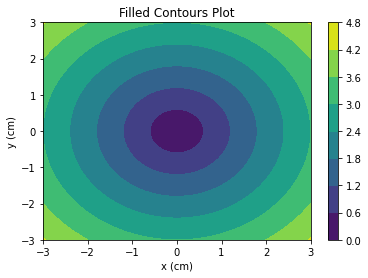

In [10]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()